In [1]:
import pandas as pd
import numpy as np
housing = pd.read_csv("Housing.csv")

In [2]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set = {len(train_set)} \n rows in test set = {len(test_set)}")


rows in train set = 436 
 rows in test set = 109


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['bedrooms'],housing['area']):
    strat_train_set = housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [4]:
strat_train_set.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,years
count,4.360000e+02,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,4.806414e+06,5220.325688,2.970183,1.288991,1.795872,0.855505,0.190367,0.369266,0.050459,0.318807,0.724771,0.243119,0.481651,25.770642
std,1.885753e+06,2230.098270,0.740631,0.515478,0.861478,0.351995,0.393042,0.483160,0.219141,0.466550,0.872271,0.429459,0.389084,14.647825
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.465000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,4.340000e+06,4725.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,26.000000
75%,5.804750e+06,6442.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,39.000000
max,1.225000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,49.000000


In [5]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 240 to 118
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             436 non-null    int64  
 1   area              436 non-null    int64  
 2   bedrooms          436 non-null    int64  
 3   bathrooms         436 non-null    int64  
 4   stories           436 non-null    int64  
 5   mainroad          436 non-null    int64  
 6   guestroom         436 non-null    int64  
 7   basement          436 non-null    int64  
 8   hotwaterheating   436 non-null    int64  
 9   airconditioning   436 non-null    int64  
 10  parking           436 non-null    int64  
 11  prefarea          436 non-null    int64  
 12  furnishingstatus  436 non-null    float64
 13  years             436 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 51.1 KB


In [6]:
strat_train_set['bedrooms'].value_counts()

3    240
2    109
4     76
5      8
6      2
1      1
Name: bedrooms, dtype: int64

In [7]:
strat_test_set['bedrooms'].value_counts()

3    60
2    27
4    19
5     2
1     1
Name: bedrooms, dtype: int64

In [8]:
housing = strat_train_set.copy()

In [9]:
corr_matrix = housing.corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
bathrooms           0.527200
area                0.524219
airconditioning     0.448333
stories             0.420942
parking             0.417418
bedrooms            0.369358
mainroad            0.325336
prefarea            0.318772
furnishingstatus    0.289723
guestroom           0.248305
basement            0.187302
hotwaterheating     0.097784
years               0.052216
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='bathrooms', ylabel='area'>,
        <Axes: xlabel='bedrooms', ylabel='area'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='area', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bathrooms'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='area', ylabel='bedrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>]], dtype=object)

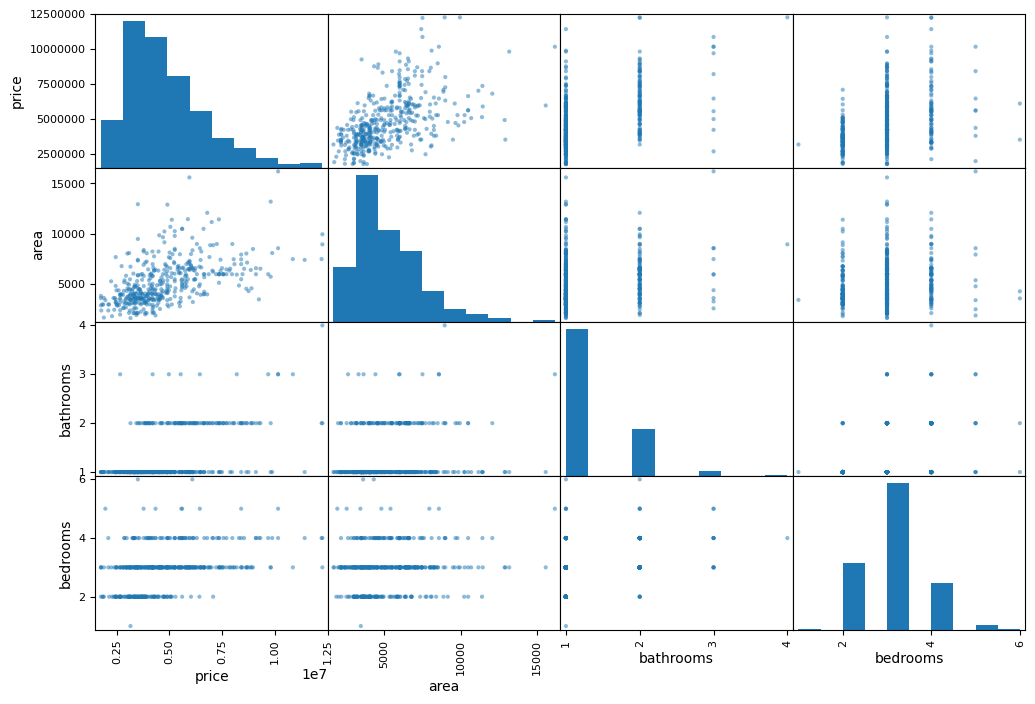

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['price','area','bathrooms','bedrooms']
scatter_matrix(housing[attributes],figsize=(12,8))

In [11]:
housing = strat_train_set.drop('price',axis=1)
housing_labels = strat_train_set['price'].copy()

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [13]:
imputer.statistics_

array([4.725e+03, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e-01,
       2.600e+01])

In [14]:
x = imputer.transform(housing)

In [15]:
housing_tr = pd.DataFrame(x,columns=housing.columns)

In [16]:
housing_tr.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,years
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,5220.325688,2.970183,1.288991,1.795872,0.855505,0.190367,0.369266,0.050459,0.318807,0.724771,0.243119,0.481651,25.770642
std,2230.098270,0.740631,0.515478,0.861478,0.351995,0.393042,0.483160,0.219141,0.466550,0.872271,0.429459,0.389084,14.647825
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,4725.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,26.000000
75%,6442.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,39.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,49.000000


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [18]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [19]:
housing_num_tr.shape

(436, 13)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing, housing_labels, test_size=0.2, random_state=42)

In [21]:
y_train

381    3605000
533    2100000
213    4893000
245    4550000
441    3220000
        ...   
420    3360000
192    5040000
539    1855000
407    3465000
449    3150000
Name: price, Length: 348, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
from sklearn import svm
from sklearn.svm import SVR
    
#model = LinearRegression()
#model = DecisionTreeRegressor()
model =  RandomForestRegressor()
#model =classifier.fit(X_train,y_train)
#model=model1.fit(housing,housing_labels)
#model=SVR(kernel='rbf')
#model.fit(X_train, y_train.ravel())
model.fit(housing_num_tr,housing_labels)


RandomForestRegressor()

In [23]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [24]:
prepared_data = my_pipeline.transform(some_data)

In [25]:
model.predict(prepared_data)

array([4380320., 5707310., 4935280., 6054825., 3328080.])

In [26]:
list(some_labels)

[4585000, 5803000, 4900000, 6090000, 3010000]

In [27]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

mse

In [28]:
rmse

411632.9905987744

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [30]:
rmse_scores

array([1186312.69143922,  720794.29771832, 1129448.70241194,
       1063981.04253007, 1027349.55601099, 1170328.15571431,
       1007007.60718966, 1130097.27437176, 1785289.04682177,
       1226353.50040004])

In [31]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("std dev",scores.std())

In [32]:
print_scores(rmse_scores)

scores: [1186312.69143922  720794.29771832 1129448.70241194 1063981.04253007
 1027349.55601099 1170328.15571431 1007007.60718966 1130097.27437176
 1785289.04682177 1226353.50040004]
mean: 1144696.187460807
std dev 252744.49495141988


In [33]:
from joblib import dump,load
dump(model,'real_estate.joblib')

['real_estate.joblib']

In [34]:
x_test = strat_test_set.drop("price",axis=1)
y_test = strat_test_set['price'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
print(final_prediction,"\n",list(y_test))

[7414960.  2723980.  6373045.  2823870.  2531760.  7056140.  4093810.
 3012835.  5117525.  3545853.5 2342497.5 2689330.  2846935.  7281120.
 4684680.  5139330.  4424980.  2534630.  6408885.  4012435.  3888325.
 4256840.  4499810.  8808094.4 6110405.  4347630.  2780050.  4889185.
 2302401.5 4110715.  3907120.  8037149.4 5297005.  6866819.4 3763515.
 5206390.  4928350.  6618570.  4917570.  4141830.  3177440.  7661675.
 5971805.  6460300.  3315056.5 7052273.2 5226095.  4902870.  5292210.
 3371620.  2518950.  4424910.  4699030.  4732980.  3466820.  3707865.
 2664480.  5877585.  2780050.  7490210.  4143370.  2920750.  5500530.
 4145788.5 5507845.  6157620.  5623380.  2529404.5 5406240.  2222500.
 4617305.  4526060.  2827580.  3707410.  3465630.  5411560.  4411330.
 4343255.  7663740.  3034360.  6065920.  3941630.  4435060.  6980540.
 3733835.  4638445.  2988443.5 3885350.  3276738.5 5712630.  4642155.
 7602898.8 3134460.  3810730.  4397820.  5315660.  3814755.  4165353.5
 4271540.  3155530.